In [5]:
#*************************************************
#Name: Jesus Lua                                 *
#                                                *
#Class 490 Machine Learning                      *
#                                                *
#Assignment 4
#                                                *
#Function: In this program, we are testing 3     *
#methods, Trees, RandomForest, and GradientBoost.*
#We are to apply oversampling or undersampling   *
#on our data, and show what to do in             *
#a scenerio where data is unbalanced             *
#We test our scores and graphs before and after  *
#we apply oversampling or undersampling          *
#*************************************************

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("healthcare-dataset-stroke-data.csv")

data.shape


(5110, 12)

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Q.1

 Train  aDecision  Tree,  Random  Forest  and  Gradient  Boosting  algorithm  to  set  a baseline performance. Use ROC AUC and Average Precision metrics for your evaluation. Also, show the precision and recall for both classes. Don’t balance the dataset.

In [50]:
subsetData = data[["gender","age","hypertension","heart_disease","ever_married",
                   "work_type","Residence_type","avg_glucose_level","bmi","smoking_status","stroke"]]

#enc = OneHotEncoder().fit(subsetData)
#newData = enc.fit_transform(subsetData)

newData = pd.get_dummies(subsetData)

newData = newData.dropna()

TargetVar = []

TargetVar.append(newData.iloc[:,5])   #This line gets the target variable "stroke"

newData = newData.drop(columns='stroke')

df = pd.DataFrame(TargetVar)
df = df.T
df

X_train, X_test, y_train, y_test = train_test_split(newData,df, random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state= 10)
tree.fit(X_train, y_train)


print("Accuracy on WHO data set: {:.3f}".format(tree.score(X_train, y_train)))

print(tree.feature_importances_)
#one thing I found was by playing around with the depth of the tree, in best case scenario
#making a treee with depth 4 is usually a best option, but for this dataset, the deeper
#the tree the more accuracy was gained from the decision tree.

Accuracy on WHO data set: 0.963
[0.57464569 0.         0.         0.30494691 0.         0.06600428
 0.         0.         0.         0.         0.00666931 0.
 0.         0.         0.         0.         0.         0.
 0.         0.04773381 0.        ]


In [47]:
#DataSet with stroke dropped from it
newData.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [46]:
df = pd.DataFrame(TargetVar)
df = df.T
df

,stroke
0,1
2,1
3,1
4,1
5,1
...,...
5104,0
5106,0
5107,0
5108,0


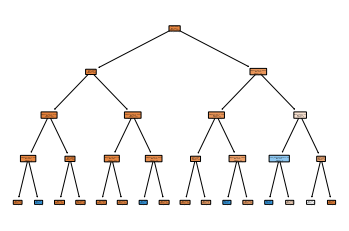

In [51]:
from sklearn.tree import plot_tree
tree_dot = plot_tree(tree,filled=True,rounded=True, feature_names= newData.columns)

In [64]:
rf = RandomForestClassifier(n_estimators=5,random_state=42)
rf.fit(X_train, y_train.values.ravel())
print("Accuracy on WHO data set using RandomForest: {:.3f}".format(rf.score(X_train, y_train)))

Accuracy on WHO data set using RandomForest: 0.993


In [70]:
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, X_train, y_train.values.ravel(), cv=10, scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.5870500517871718, 0.07409742415869333)

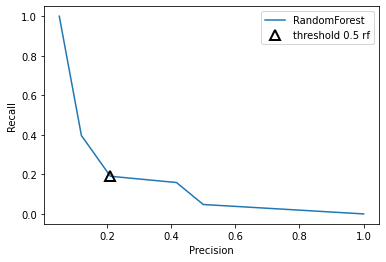

In [80]:
from sklearn.metrics import precision_recall_curve

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
#plt.plot(precision, recall, label="svc")
#plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero svc", 
#         fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="RandomForest")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',markersize=10, 
         label="threshold 0.5 rf", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


In [81]:


from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt.fit(X_train, y_train.values.ravel())
print("Accuracy on WHO data set using GradientBoosting: {:.3f}".format(gbrt.score(X_train, y_train)))

Accuracy on WHO data set using GradientBoosting: 0.975


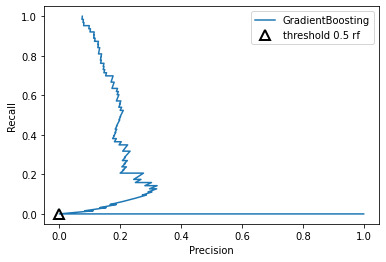

In [83]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, gbrt.predict_proba(X_test)[:, 1])
plt.plot(precision_rf, recall_rf, label="GradientBoosting")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',markersize=10, 
         label="threshold 0.5 rf", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [71]:
scores = cross_validate(gbrt, X_train, y_train.values.ravel(), cv=10, scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.7890400434112922, 0.13979861823489992)

Q2. 

Balance the dataset using any 4 methods we have discussed in the class and again train a  Decision  Tree,  Random  Forest  and  Gradient  Boosting  algorithm  to  compare  the performance with models from Q1.

In [89]:
#Below I will be resampling the data using the RandomOverSampler Method
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_resample(X_train, y_train.values.ravel())
print(X_train.shape)
print(X_train_oversample.shape)
print(np.bincount(y_train_oversample))

(3681, 21)
(7070, 21)
[3535 3535]


In [99]:
GBRT = GradientBoostingClassifier(random_state=0, max_depth=4)
GBRT.fit(X_train_oversample, y_train_oversample.ravel())
RF = RandomForestClassifier(n_estimators=5,random_state=42)
RF.fit(X_train_oversample, y_train_oversample.ravel())
TREE = DecisionTreeClassifier(max_depth=4,random_state= 10)
TREE = tree.fit(X_train_oversample, y_train_oversample)

print("Accuracy on WHO data set using GradientBoosting: {:.3f}".format(gbrt.score(X_train_oversample, y_train_oversample)))
scores = cross_validate(gbrt, X_train_oversample, y_train_oversample, cv=10, scoring=('roc_auc', 'average_precision'))
print("Mean socore on Test Roc Auc: {:.3f}".format(scores['test_roc_auc'].mean()))
print("Mean socore on Test Average Precision: {:.3f}".format(scores['test_average_precision'].mean()))

Accuracy on WHO data set using GradientBoosting: 0.690
Mean socore on Test Roc Auc: 0.982
Mean socore on Test Average Precision: 0.974


In [100]:
print("Accuracy on WHO data set using RandomForest after Resampling: {:.3f}".format(RF.score(X_train_oversample, y_train_oversample)))
scores = cross_validate(RF, X_train_oversample, y_train_oversample, cv=10, scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

Accuracy on WHO data set using RandomForest after Resampling: 0.999


(0.9992925849458235, 0.9985899578260522)

In [101]:
print("Accuracy on WHO data set for Trees method after oversampling: {:.3f}".format(tree.score(X_train_oversample, y_train_oversample)))

Accuracy on WHO data set for Trees method after oversampling: 0.792


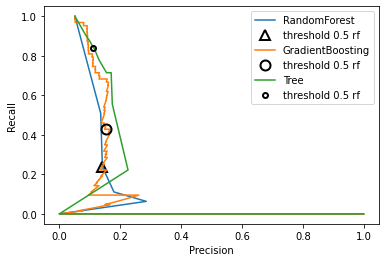

In [106]:
#Plot Graph after oversampling for all methods
precision_RF, recall_RF, thresholds_RF = precision_recall_curve(y_test, RF.predict_proba(X_test)[:, 1])
plt.plot(precision_RF, recall_RF, label="RandomForest")
close_default_RF = np.argmin(np.abs(thresholds_RF - 0.5))
plt.plot(precision_RF[close_default_RF], recall_RF[close_default_RF], '^', c='k',markersize=10, 
         label="threshold 0.5 rf", fillstyle="none", mew=2)
precision_GBRT, recall_GBRT, thresholds_GBRT = precision_recall_curve(y_test, GBRT.predict_proba(X_test)[:, 1])
plt.plot(precision_GBRT, recall_GBRT, label="GradientBoosting")
close_default_GBRT = np.argmin(np.abs(thresholds_GBRT - 0.5))
plt.plot(precision_GBRT[close_default_GBRT], recall_GBRT[close_default_GBRT], 'o', c='k',markersize=10, 
         label="threshold 0.5 rf", fillstyle="none", mew=2)

precision_TREE, recall_TREE, thresholds_TREE = precision_recall_curve(y_test, TREE.predict_proba(X_test)[:, 1])
plt.plot(precision_TREE, recall_TREE, label="Tree")
close_default_TREE = np.argmin(np.abs(thresholds_TREE - 0.5))
plt.plot(precision_TREE[close_default_TREE], recall_TREE[close_default_TREE], '.', c='k',markersize=10, 
         label="threshold 0.5 rf", fillstyle="none", mew=2)


plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

$Finding feature importance$


In [109]:
print("Feature importance of tree method")
print(TREE.feature_importances_)

Feature importance of tree method
[0.80237233 0.         0.         0.07498733 0.10143959 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02120075 0.        ]


In [110]:
print("Feature importance of RandomForest")
print(RF.feature_importances_)

Feature importance of RandomForest
[3.28579517e-01 2.84564773e-02 2.08109669e-02 1.97601597e-01
 1.71303989e-01 1.08444458e-02 1.02128253e-02 4.54193669e-05
 8.77279317e-02 7.04634817e-05 1.32874090e-02 0.00000000e+00
 1.70160965e-02 1.30066015e-02 2.95565976e-03 1.37908376e-02
 1.33730124e-02 1.85062277e-02 1.71442869e-02 2.00255244e-02
 1.52407118e-02]


In [111]:
print("Feature importance of GradientBoosting")
print(GBRT.feature_importances_)

Feature importance of GradientBoosting
[5.56780033e-01 7.99142312e-03 5.41070012e-03 2.01505266e-01
 1.69212382e-01 3.46364304e-03 1.93568730e-03 0.00000000e+00
 1.61528587e-03 2.67795365e-04 8.85402627e-03 0.00000000e+00
 3.68479318e-03 1.22473142e-02 0.00000000e+00 1.00033869e-03
 2.42037176e-03 6.03045795e-03 3.00850677e-03 1.27060621e-02
 1.86591319e-03]


$Report$

For every method used, Trees, Random Forest, Gradient Boosting, the scores came close to to average  0.80

While looking at the graph, I knew the data was unbalanced due to the majority class having the most samples. 

In order to fix this oversampling was used to add copies of the manority class to the training data set for a more 

balance results on our precision and recall graph. The scoring was based on ROC AUC and Avergae Precision and 

after oversampling our scoreds went up to 0.98 on average.